In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_gen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=40
    )

train_generator = train_gen.flow_from_directory(
    "/content/drive/My Drive/Gender Prediction Dataset/train",
    target_size=(200,200),
    color_mode="grayscale",
    batch_size = 32,
    class_mode='categorical'
)

Found 1600 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [ ]:
test_gen = ImageDataGenerator()

test_generator = test_gen.flow_from_directory(
    "/content/drive/My Drive/Gender Prediction Dataset/test",
    target_size=(200,200),
    color_mode="grayscale",
    batch_size = 32,
    class_mode='categorical'
)

Found 340 images belonging to 2 classes.


In [ ]:
from google.colab.patches import cv2_imshow

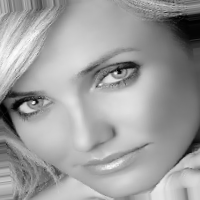

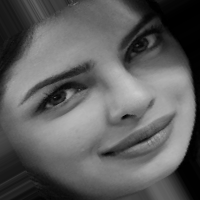

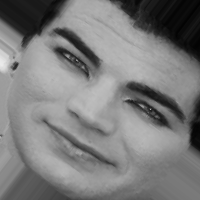

In [ ]:
x,y = train_generator.next()
for i in range(3):
    cv2_imshow(x[i])

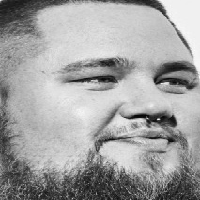

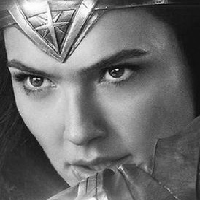

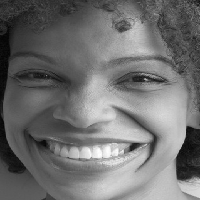

In [ ]:
x,y = test_generator.next()
for i in range(3):
    cv2_imshow(x[i])

# CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import *

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)      

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/Gender Prediction Dataset/gender_model_final.hdf5",monitor='val_loss',save_best_only=True)

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 10,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/10
50/50 [==============================] - 15s 296ms/step - loss: 0.1773 - acc: 0.9337 - val_loss: 0.0337 - val_acc: 0.9147
Epoch 2/10
50/50 [==============================] - 14s 282ms/step - loss: 0.1813 - acc: 0.9269 - val_loss: 0.0966 - val_acc: 0.9000
Epoch 3/10
50/50 [==============================] - 14s 280ms/step - loss: 0.1903 - acc: 0.9300 - val_loss: 0.7709 - val_acc: 0.8529
Epoch 4/10
50/50 [==============================] - 14s 282ms/step - loss: 0.1964 - acc: 0.9319 - val_loss: 0.1293 - val_acc: 0.9029
Epoch 5/10
50/50 [==============================] - 14s 283ms/step - loss: 0.1429 - acc: 0.9488 - val_loss: 0.0370 - val_acc: 0.9088
Epoch 6/10
50/50 [==============================] - 15s 291ms/step - loss: 0.1659 - acc: 0.9350 - val_loss: 0.1340 - val_acc: 0.8941
Epoch 7/10
50/50 [==============================] - 14s 288ms/step - loss: 0.1713 - acc: 0.9300 - val_loss: 0.2053 - val_acc: 0.9000
Epoch 8/10
50/50 [==============================] - 14s 285ms/step - 